## Dataset
- Dataset: German Credit Data Dataset
- Description: Classifies people described by a set of attributes as good or bad credit risks.


## Importing Libraries and Data



In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
# Replace 'your_dataset_url' with the actual URL or file path
url = 'data/german.data'
df = pd.read_csv(url, delimiter=' ')

## Exploratory Data Analysis (EDA)
There were no column names in the dataset so I had to add those in myself by looking at the documentation.

Also random source I read that helped me through EDA: https://medium.com/@nomannayeem/mastering-exploratory-data-analysis-eda-a-comprehensive-python-pandas-guide-for-data-insights-c0be7c5b8889

Basically just checking what the columns are, what the rows look like, and df.describe() which gives a bunch of information about the numeric columns

In [127]:
print(df.shape)
df.columns = ["checking_status", "duration", "credit_history", "purpose", "credit_amount", "savings_status",
           "employment_years", "installment_rate", "personal", "guarantors", "years_in_residence", "property",
           "age", "installment_other", "housing", "credit_existing", "employment_role", "people_liable",
           "has_telephone", "foreign_worker", "good_bad"]

# Explore the dataset's structure and summary statistics
print(df.head())
print(df.tail())
df.info()



# Hypothesis Testing
# Test the formulated hypotheses using statistical tests or visualizations

# Documentation and Reporting
# Document the entire analysis process, including code and explanations
# Summarize key findings in a clear and concise report

(999, 21)
  checking_status  duration credit_history purpose  credit_amount  \
0             A12        48            A32     A43           5951   
1             A14        12            A34     A46           2096   
2             A11        42            A32     A42           7882   
3             A11        24            A33     A40           4870   
4             A14        36            A32     A46           9055   

  savings_status employment_years  installment_rate personal guarantors  ...  \
0            A61              A73                 2      A92       A101  ...   
1            A61              A74                 2      A93       A101  ...   
2            A61              A74                 2      A93       A103  ...   
3            A61              A73                 3      A93       A101  ...   
4            A65              A73                 2      A93       A101  ...   

   property age  installment_other housing credit_existing  employment_role  \
0      A121  22

In [128]:
print(df.describe())

         duration  credit_amount  installment_rate  years_in_residence  \
count  999.000000     999.000000        999.000000          999.000000   
mean    20.917918    3273.362362          2.971972            2.843844   
std     12.055619    2823.365811          1.118802            1.103665   
min      4.000000     250.000000          1.000000            1.000000   
25%     12.000000    1368.500000          2.000000            2.000000   
50%     18.000000    2320.000000          3.000000            3.000000   
75%     24.000000    3972.500000          4.000000            4.000000   
max     72.000000   18424.000000          4.000000            4.000000   

              age  credit_existing  people_liable    good_bad  
count  999.000000       999.000000     999.000000  999.000000  
mean    35.514515         1.406406       1.155155    1.300300  
std     11.337487         0.577639       0.362234    0.458618  
min     19.000000         1.000000       1.000000    1.000000  
25%     27.00

In [129]:
# Checking if data needs to be cleaned (I noticed afterwards that the website specifically mentions no missing data but why not keep it in)
missing_values = df.isnull().sum()
missing_values

# Adding an extra category and then converting cateogircal to numerical (one-hot encodings)
df['monthly_amount'] = df['credit_amount'] / df['duration']
df2 = pd.get_dummies(df)

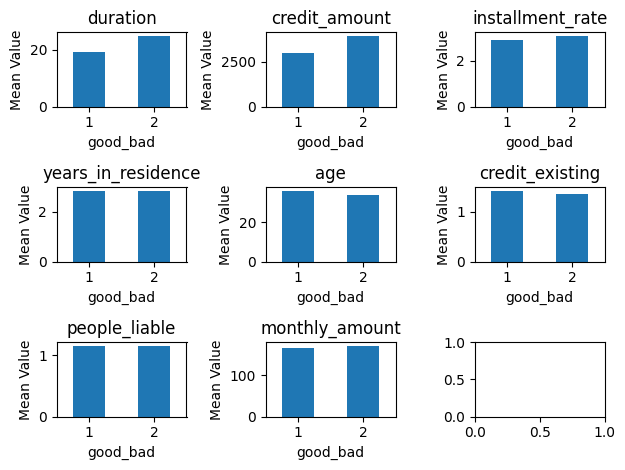

In [134]:
# Visualize key features using plots

j = 0
numeric_cols = ["duration", "credit_amount", "installment_rate", "years_in_residence", "age", "credit_existing", "people_liable", "monthly_amount"]
fig, axs = plt.subplots(3, 3)
for i in axs:
    for k in i:
        if j < len(numeric_cols):
            means = df.groupby('good_bad')[numeric_cols[j]].mean()
            means.plot(kind='bar', ax=k)
            k.set_title(numeric_cols[j])
            k.set_ylabel('Mean Value')
            k.set_xticklabels(means.index, rotation=0) 
        j += 1

    
plt.tight_layout()

We can immediately see a few differences between good and bad credit risk: the average duration and credit amount of a loan for someone who is ultimately a bad credit risk appear noticeably higher than for good credit risks.

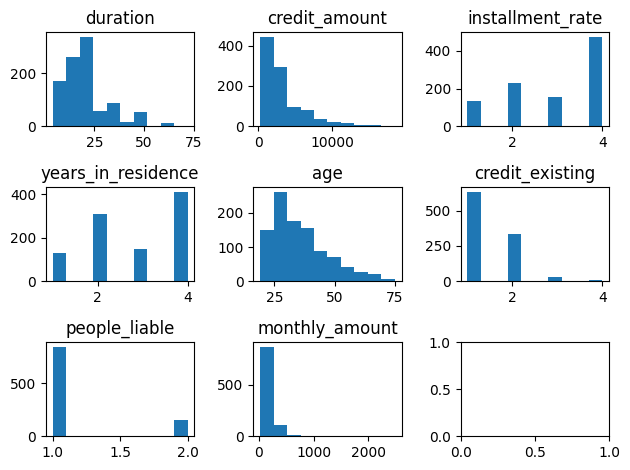

In [48]:
# Visualize key features using plots
fig, axs = plt.subplots(3, 3)
j = 0
for i in axs:
    for k in i:
        if j < len(numeric_cols):
            k.hist(df[numeric_cols[j]], bins=10)
            k.set_title(numeric_cols[j])
            j += 1

plt.tight_layout()
plt.show()


Breaking the data down into histograms, we can understand the data we have a little bit more. There are many more data points for lower duration, credit amount, and age. 

## Hypothesis Formulation

## Some Hypotheses
- Lower age is correlated with bigger credit amount
- Renters are worse on credit than homeowners
- Loans for businesses are worse than loans for education
- The most important factors for good vs bad will be credit history (bad will predict bad), stable employment (4+ years will be better than 0-4 years)
- age and monthly amount will not be significant factors

## Correlation Testing

<Axes: >

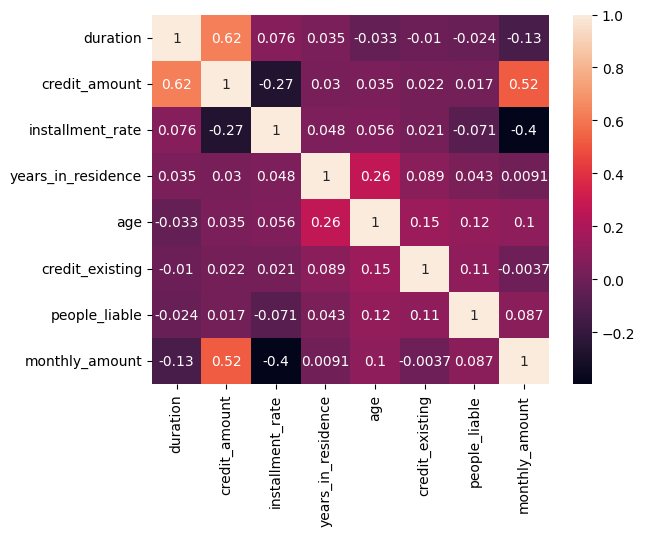

In [121]:
sns.heatmap(df[numeric_cols].corr(), annot=True)

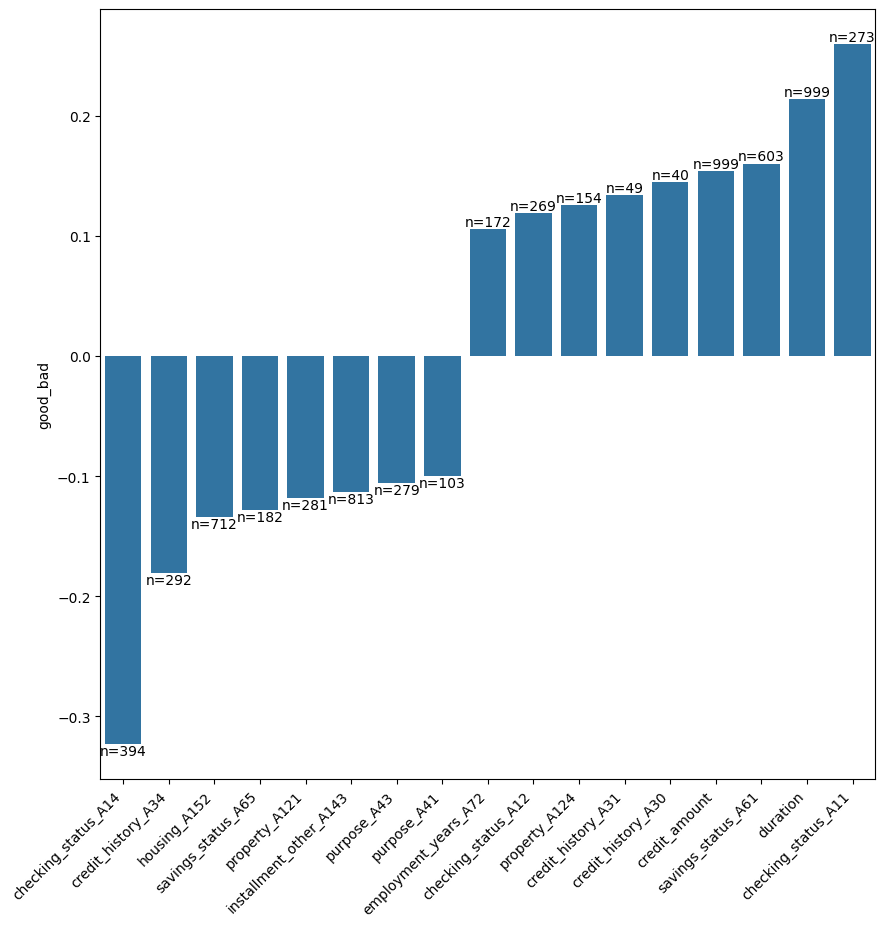

In [103]:
good_bad_coors = df2.corr()['good_bad'].drop('good_bad')
good_bad_coors = good_bad_coors[abs(good_bad_coors) > 0.1].sort_values()
plt.figure(figsize=(10, 10))
plt.xticks(rotation=45, ha='right')
sns.barplot(good_bad_coors)

# This part was chatgpt
counts = {col: (df2[col] != 0).sum() for col in good_bad_coors.index}
for i, (index, value) in enumerate(good_bad_coors.items()): 
    plt.text(i, value, f'n={counts[index]}', ha='center', va='bottom' if value > 0 else 'top')


## Correlations Report

The highest correlated variables with the expected result are as follows (positive would correspond to bad credit, negative would correspond to good credit, because bad is coded as 2 and good as 1):
- Less than 0 DM in existing checking account (i.e. actively in debt)
- duration: Longer loans
- Savings account/bonds with less than 100 DM
- higher credit amount
- No credits taken/all credits paid back duly
- All credits paid back duly
- Unknown/no property
- Checking account between 0 and 200 DM
- <1 year of employment

The highest negative correlations (i.e. correlated with good credit):
- No checking account
- critical account/other credits existing at other bank
- Homeowner
- unknown/no savings account
- property: real estate
- Other installment plans: None
- Purpose is radio/television
- Purpose is used car



Some of these findings are quite obvious, and some of them are quite weird and make me rethink whether either the data is flawed or I am mistaken in some way. 

I suspect that most of the weird correlations can be explained by lower sample size. For the positive correlations (i.e. bad credit risks), the outliers were "No credits taken/all credits paid back duly" and "all credits paid back duly," and sure enough both have a very low sample size (n < 50).

As for the good credit, there aren't any egregiously low sample sizes (maybe unknown/no savings account at 182 is a little low). So the unexpected findings, such as no savings account being a good credit risk is still not explained.

## Official Hypothesis Testing

#### Testing for effect of homeowners

In [90]:
import scipy
contingency = pd.crosstab(df['good_bad'], df['housing'])
print(contingency)
_, p_value, _, _ = scipy.stats.chi2_contingency(contingency)
print(p_value)

housing   A151  A152  A153
good_bad                  
1          109   526    64
2           70   186    44
0.00011827353819386505


#### Testing for effect of loans for business vs school

In [100]:
business_school = df[(df['purpose'] == 'A46') | (df['purpose'] == 'A49')]
contingency = pd.crosstab(business_school['good_bad'], business_school['purpose'])
print(contingency)
_, p_value, _, _ = scipy.stats.chi2_contingency(contingency)
print(p_value)


purpose   A46  A49
good_bad          
1          28   63
2          22   34
0.37930307492708826


#### Testing for effect of years in current employment

In [106]:
contingency = pd.crosstab(df['good_bad'], df['employment_years'])
print(contingency)
_, p_value, _, _ = scipy.stats.chi2_contingency(contingency)
print(p_value)

employment_years  A71  A72  A73  A74  A75
good_bad                                 
1                  39  102  235  135  188
2                  23   70  104   39   64
0.0011102901357647444


#### Testing for effect of age

In [118]:
age_good = df[df['good_bad'] == 1]['age']
age_bad = df[df['good_bad'] == 2]['age']
# print(age_good, age_bad)
_, p_value = scipy.stats.ttest_ind(age_good, age_bad)
print(f'p value for age: {p_value}')
print(f'good mean age: {age_good.mean()}, bad mean age: {age_bad.mean()}')

monthly_good = df[df['good_bad'] == 1]['monthly_amount']
monthly_bad = df[df['good_bad'] == 2]['monthly_amount']
# print(age_good, age_bad)
_, p_value = scipy.stats.ttest_ind(monthly_good, monthly_bad)
print(f'p value for age: {p_value}')
print(f'good mean age: {monthly_good.mean()}, bad mean age: {monthly_bad.mean()}')

p value for age: 0.004559484592059989
good mean age: 36.18025751072961, bad mean age: 33.96333333333333
p value for age: 0.5546808144213842
good mean age: 165.7782228212798, bad mean age: 172.04403119873953


#### Checking age vs credit amount

Text(0, 0.5, 'Credit Amount (DM)')

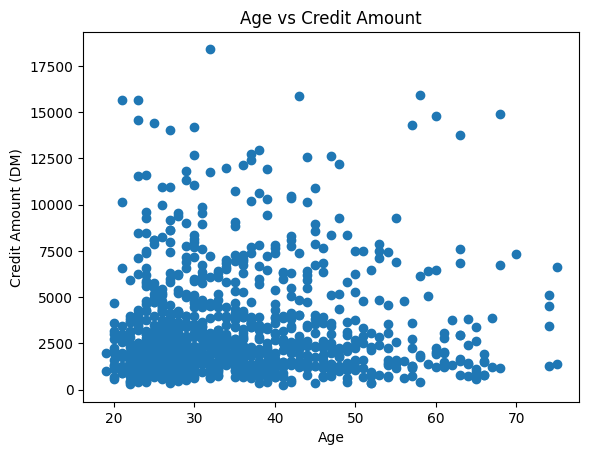

In [137]:
plt.scatter(df['age'], df['credit_amount'])
plt.title("Age vs Credit Amount")
plt.xlabel("Age")
plt.ylabel("Credit Amount (DM)")


## Findings about my Hypotheses

#### Lower age is correlated with bigger credit amount
The scatter plot does not show any obvious correlation, and the correlation found in the small heatmap above is very low. Therefore I feel confident in rejecting my hypothesis

#### **Renters are worse on credit than homeowners**
The p value for a different between owning, renting, and "for free" is < 0.001. The contingency table also shows that homeowners have a much higher rate of being good credit risk. This supports my hypothesis on the subject.


#### **Loans for businesses are worse than loans for education**
On the surface my hypothesis that credit for businesses would be more risky looks false (in the contingency table, education loans are more risky), but the result of the chi squared test is p=0.379, which is not enough to reject the null hypothesis and implies there is not enough data about these two use types to make a credible inference.


#### **The most important factors for good vs bad will be credit history (bad will predict bad), stable employment (4+ years will be better than 0-4 years)**
Unstable employment was in fact a strong factor for bad credit, but stable employment was not a top factor for good credit. However, years employed at current position does have a statistically significant (p < 0.005) effect on credit risk. My hypothesis was rather unclear but the data seems to be in support of it.

#### **age and monthly amount will not be significant factors**
Age has a statisticaly significant impact on good vs bad credit (p < 0.005), but the average age of someone with a good credit risk is only 36 as compared to 34 for someone with bad credit. My hypothesis can be rejected

Monthly amount does not significantly (p $\approx$ 0.55) impact credit risk, which supports my hypothesis